In [81]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
from matplotlib import pyplot as plt
import pandas as pd
import os
os.chdir('../../')
print(os.getcwd())
import statistics

/home/florian/Documents


Next we calculate the trade communities for our base scenario as well as global catastrophic infrastructure loss and abrupt sunlight reduction.

In [3]:
base_year = 2022

base = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    cd_kwargs={"seed": 2},
    make_plot=False,
)


nw_base = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_47tg_y3_swheat.csv",
    scenario_name="Nuclear Winter with All Countries",
    cd_kwargs={"seed": 2},
    make_plot=False,
)

nw1 = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_47tg_y3_swheat.csv",
    scenario_name="Without Pakistan and India",
    cd_kwargs={"seed": 2},
    make_plot=False,
    countries_to_remove=["Pakistan", "India"]
)

nw2 = PyTradeShifts(
    crop="Wheat",
    base_year=base_year,
    scenario_file_name="nuclear_winter/xia_47tg_y3_swheat.csv",
    scenario_name="Without United States and Russia",
    cd_kwargs={"seed": 2},
    make_plot=False,
    countries_to_remove=["United States", "Russia"]
)    

Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario Nuclear Winter with All Countries.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Removed countries: ['South Sudan']
Prebalanced trade matrix.
Corrected re-exports.
Removed 2 countries from the trade matrix.
Removed countries with trade below the 75th percentile.
Applied scenario Without Pakistan and India.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no tr

To compare the scenario to each other, we have to do a bunch of additional calculations. These all happen in the postprocessing class. Anchor countries are user-specified list of countries that the script attempts to keep the same colour between scenarios.

In [30]:
comparison = Postprocessing([base, nw_base, nw1, nw2], anchor_countries=["Brazil", "United States", "Russia", "Uzbekistan" "Germany"])

Starting postprocessing computations...


In [42]:
scenarios = ["base", "Base Nuclear Winter", "India/Pakistan", "United States/Russia"]
# Create an empty dataframe
network_df = pd.DataFrame(columns=['Scenario', "Country", 'Jaccard Distance', 'Imports Relative Difference'])
for i in range(1, 4):
    # Calculate the median for the jaccard distance
    jaccard_similarity = comparison.jaccard_indices[i].values()

    # Calculate the median for the imports relative difference
    imports_relative_difference = comparison.imports_difference[i-1].values()

    

    # Concat the data to the dataframe
    temp_df = pd.DataFrame({
        'Scenario': scenarios[i],
        'Country': country
        'Jaccard Distance': median_jaccard_distance,
        'Imports Relative Difference': median_imports_relative_difference
    }, index=[0])
    network_df = pd.concat([network_df, temp_df], ignore_index=True)
    network_df.index = network_df.Scenario

/tmp/ipykernel_51559/910864712.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)


Text(0.5, 0, 'Imports Relative Difference [%]')

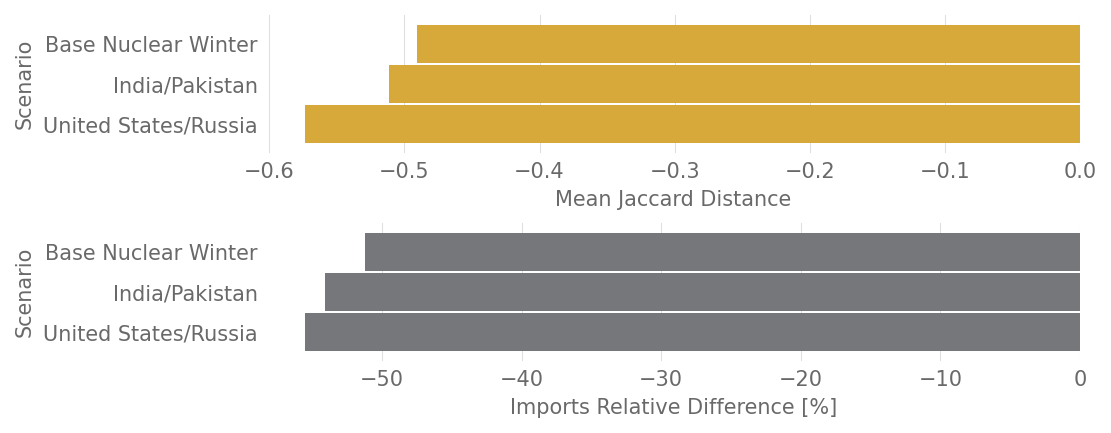

In [93]:
# Reverse the order of the dataframe
network_df = network_df[::-1]

axes = network_df.plot(kind="barh", subplots=True, label="scenario", layout=(2, 1), legend=False, width=0.95, figsize=(7, 3), sharex=False, color=["#d6a93a", "#75777a"])
# Remove the titles
axes[0][0].set_title("")
axes[1][0].set_title("")
# Remove x grid
axes[0][0].grid(axis="y")
axes[1][0].grid(axis="y")
# incre4ase space between subplots
plt.subplots_adjust(hspace=0.5)

# Add x labels
axes[0][0].set_xlabel("Mean Jaccard Distance")
axes[1][0].set_xlabel("Imports Relative Difference [%]")

Next lets look at how the trade communities change globally in the different scenarios. 

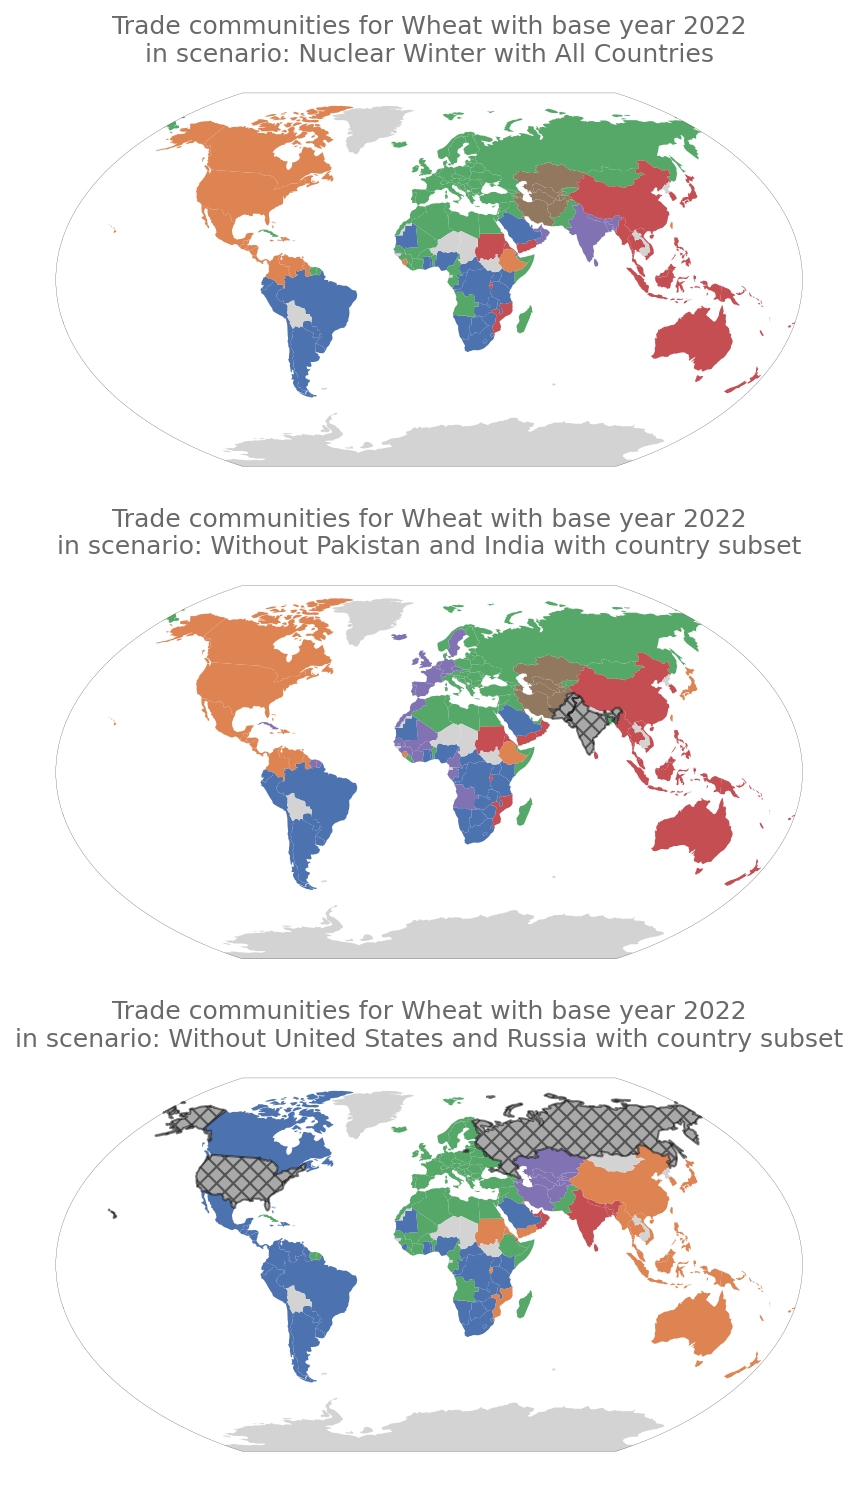

In [ ]:
comparison.plot_all_trade_communities(figsize=(15, 10))

We can also try to quantify how different the communities are in each scenario for each country.
The natural way of doing this is the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
It measures the similarity between two sets.
So for each country we can compute a Jaccard distance (1-Jaccard index)
showing us by how much for each country their community changed in comparison with the base scenario.

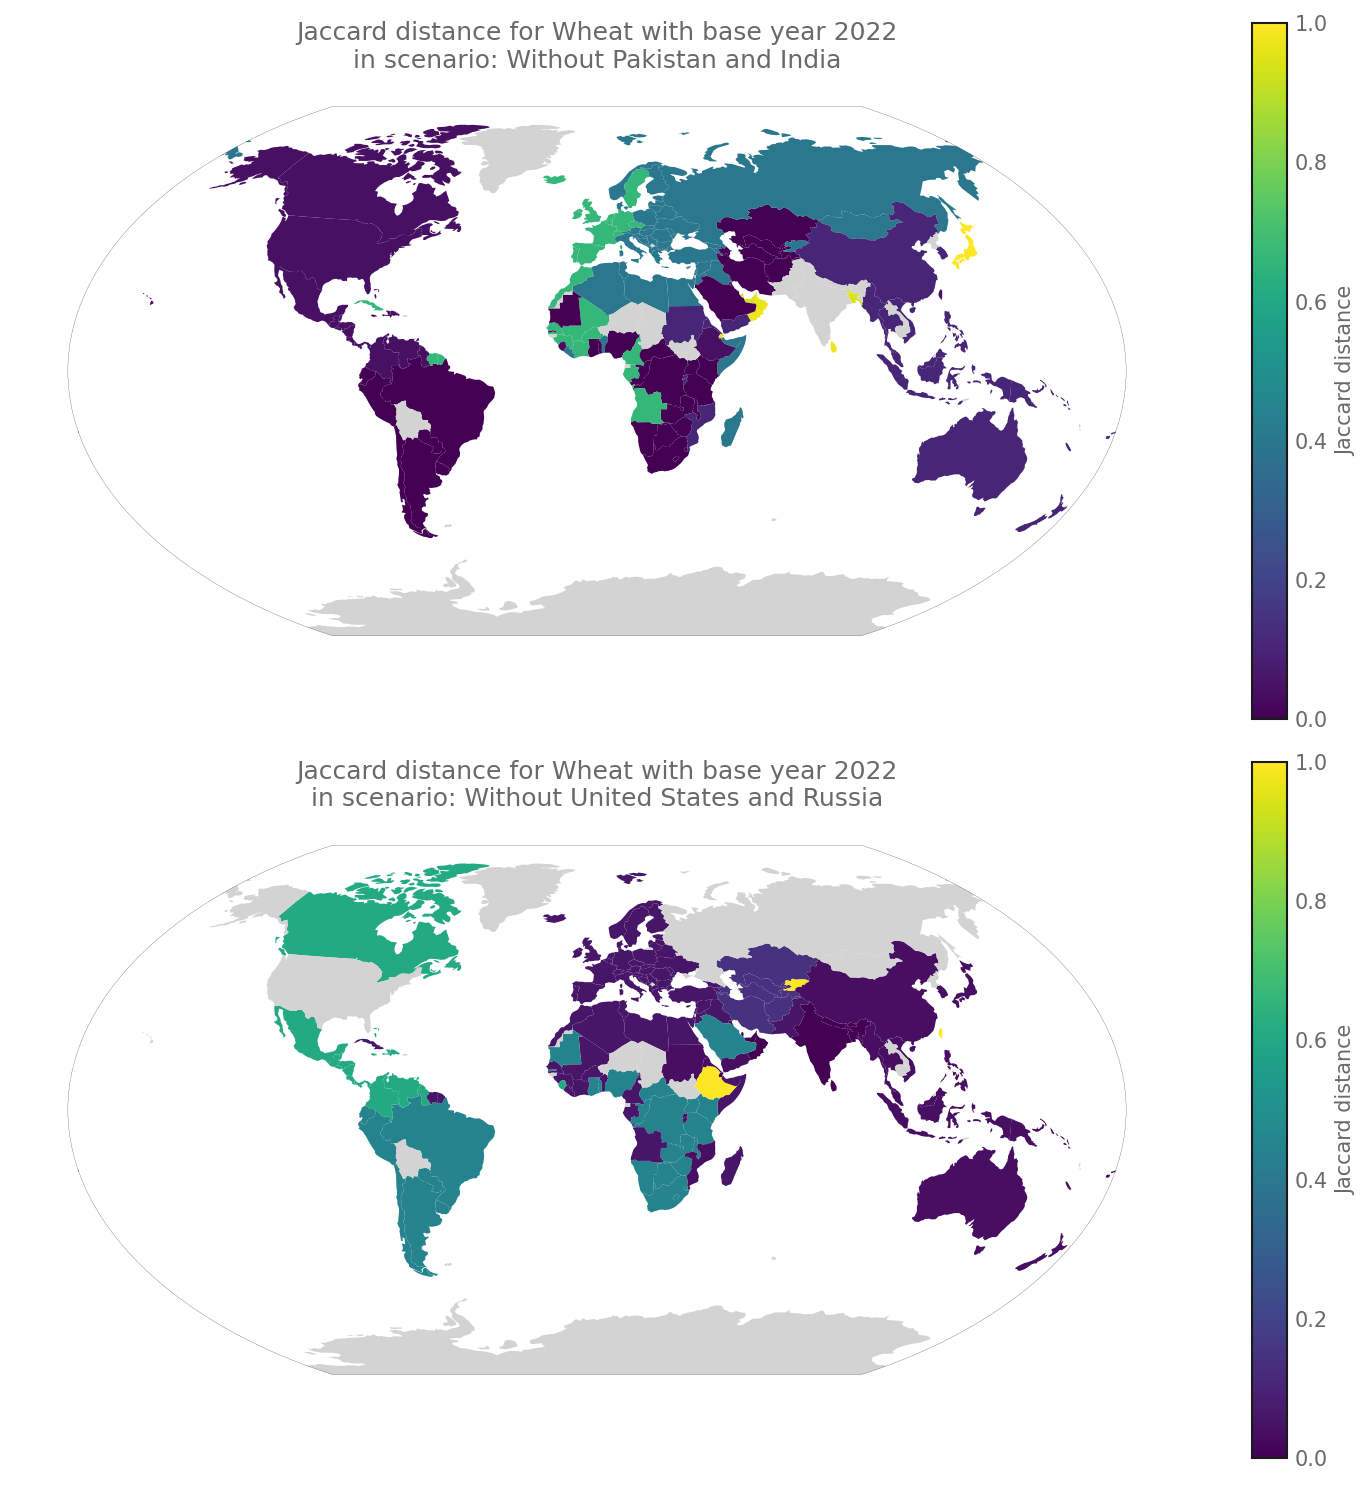

In [ ]:
comparison.plot_community_difference(figsize=(10, 10), vmin=0, vmax=1)

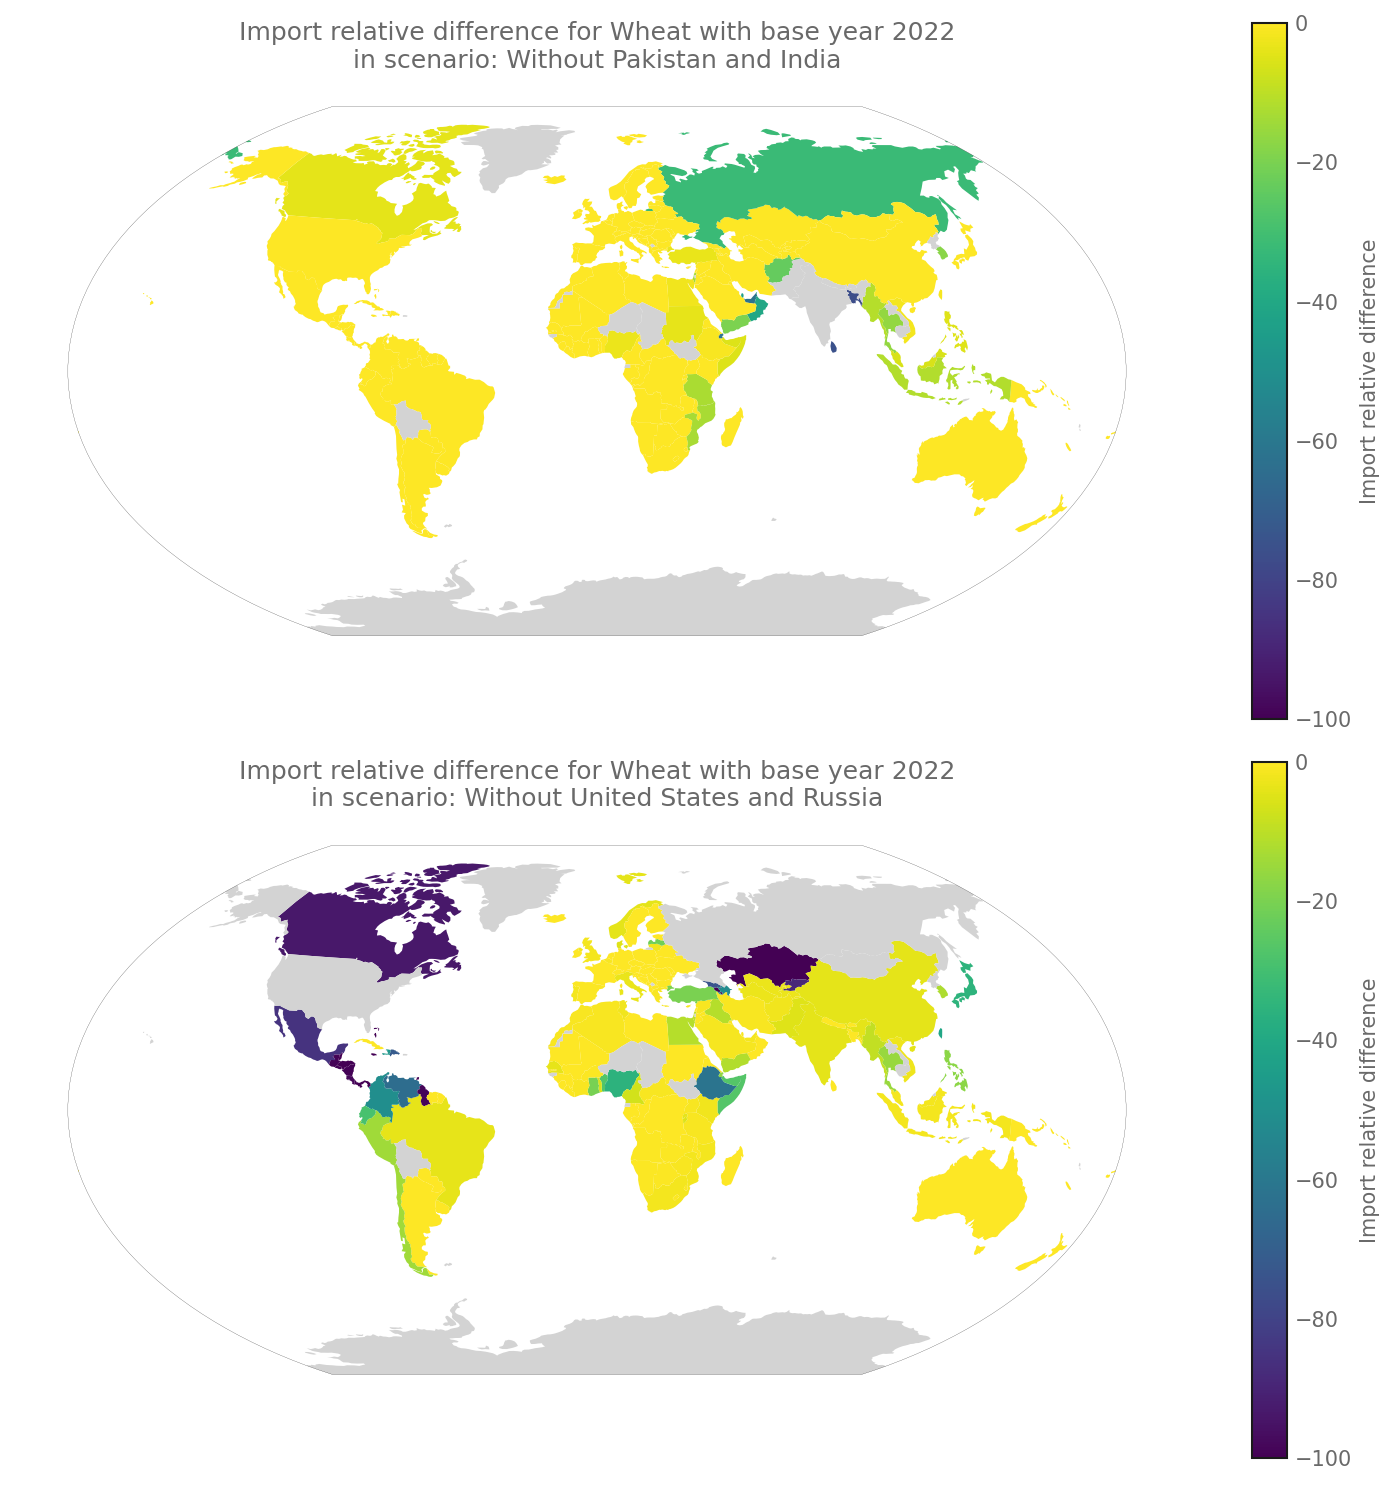

In [ ]:
comparison.plot_imports_difference(figsize=(10, 10), vmin=-100, vmax=0)

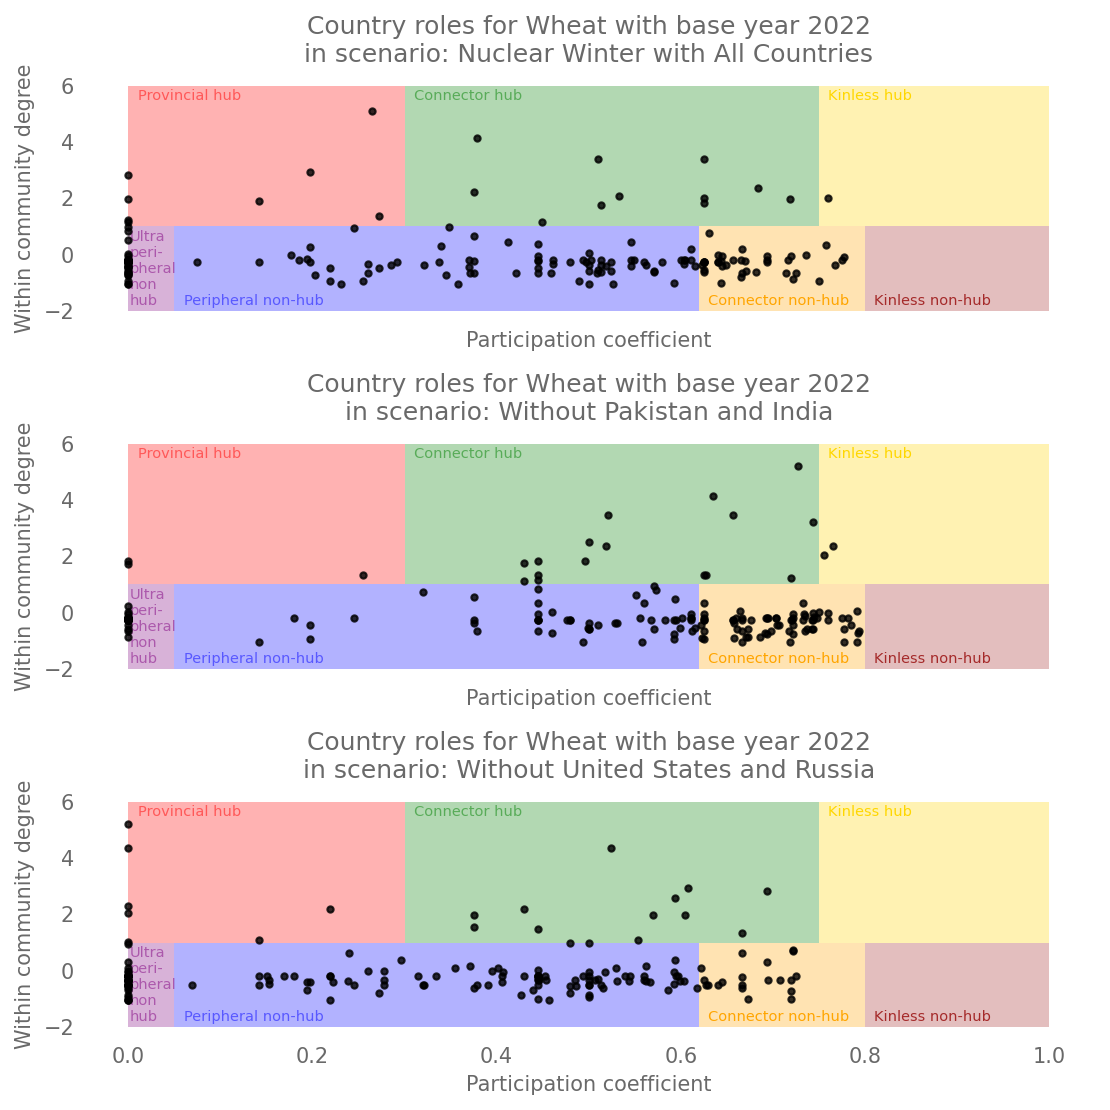

In [ ]:
comparison.plot_roles()

We can also study the degree centralities (in and out) for all networks:

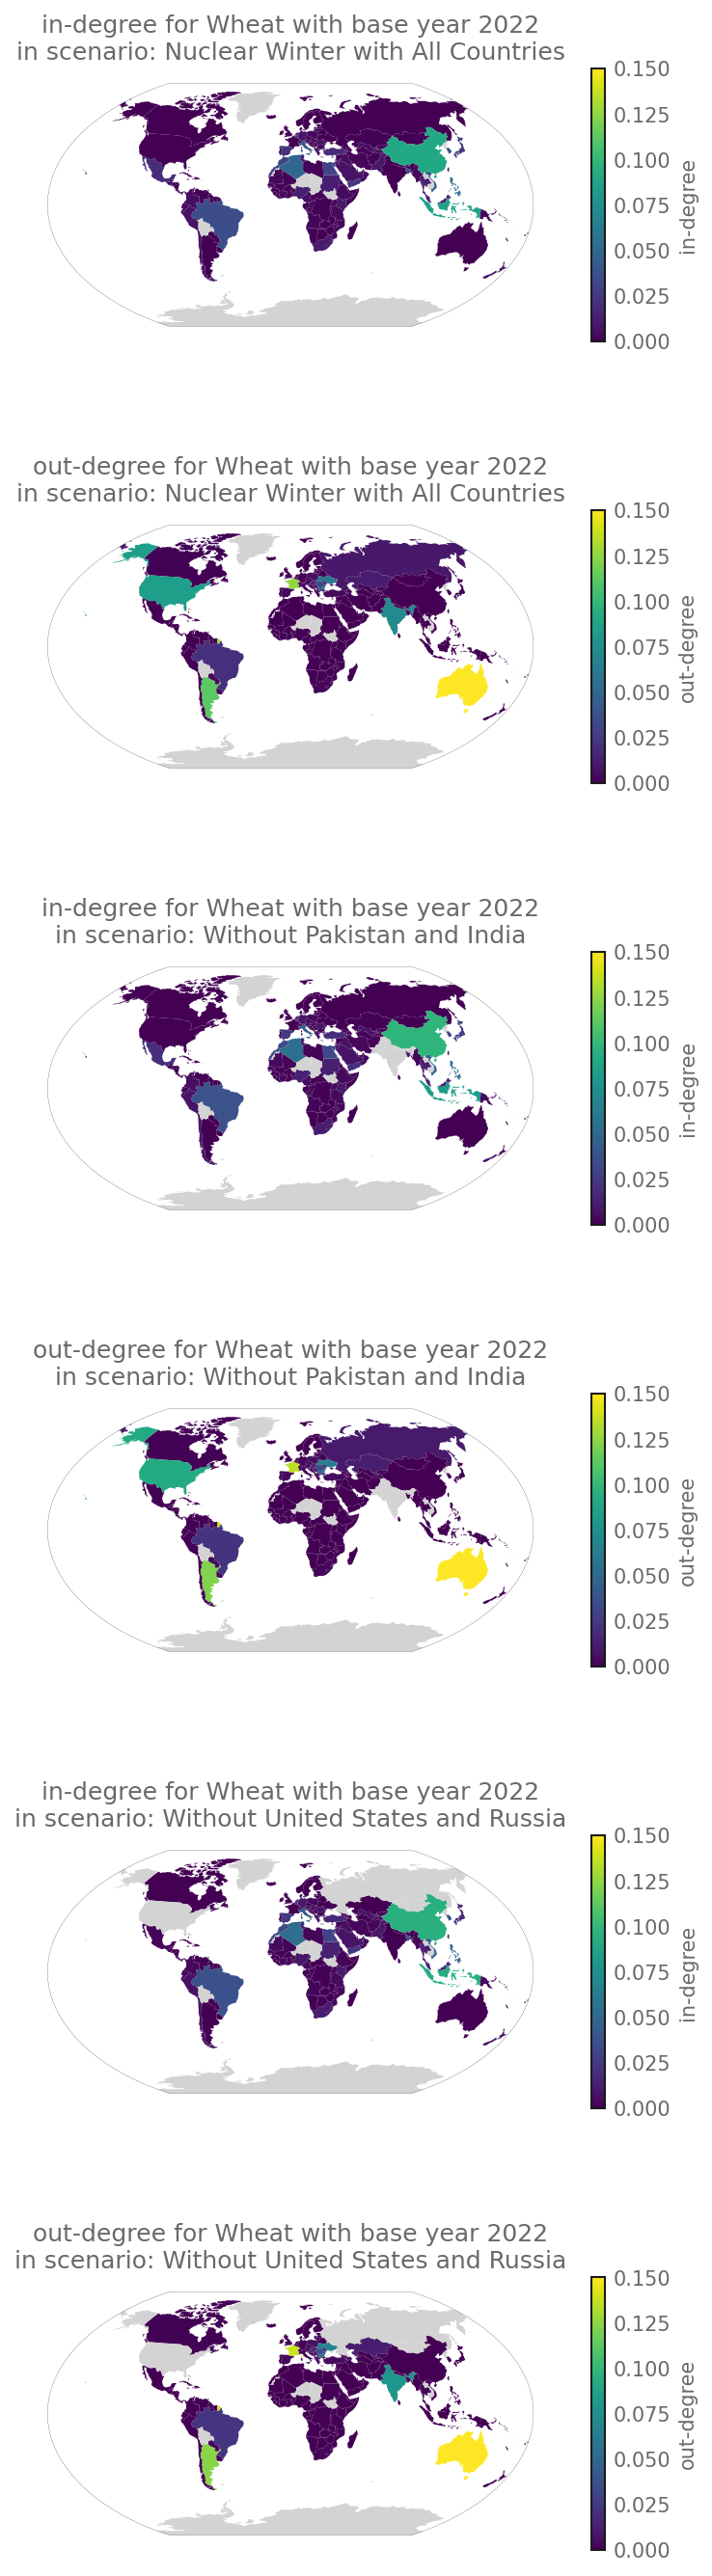

In [ ]:
comparison.plot_centrality_maps(figsize=(5, 25), shrink=0.2, vmin=0, vmax=0.15)

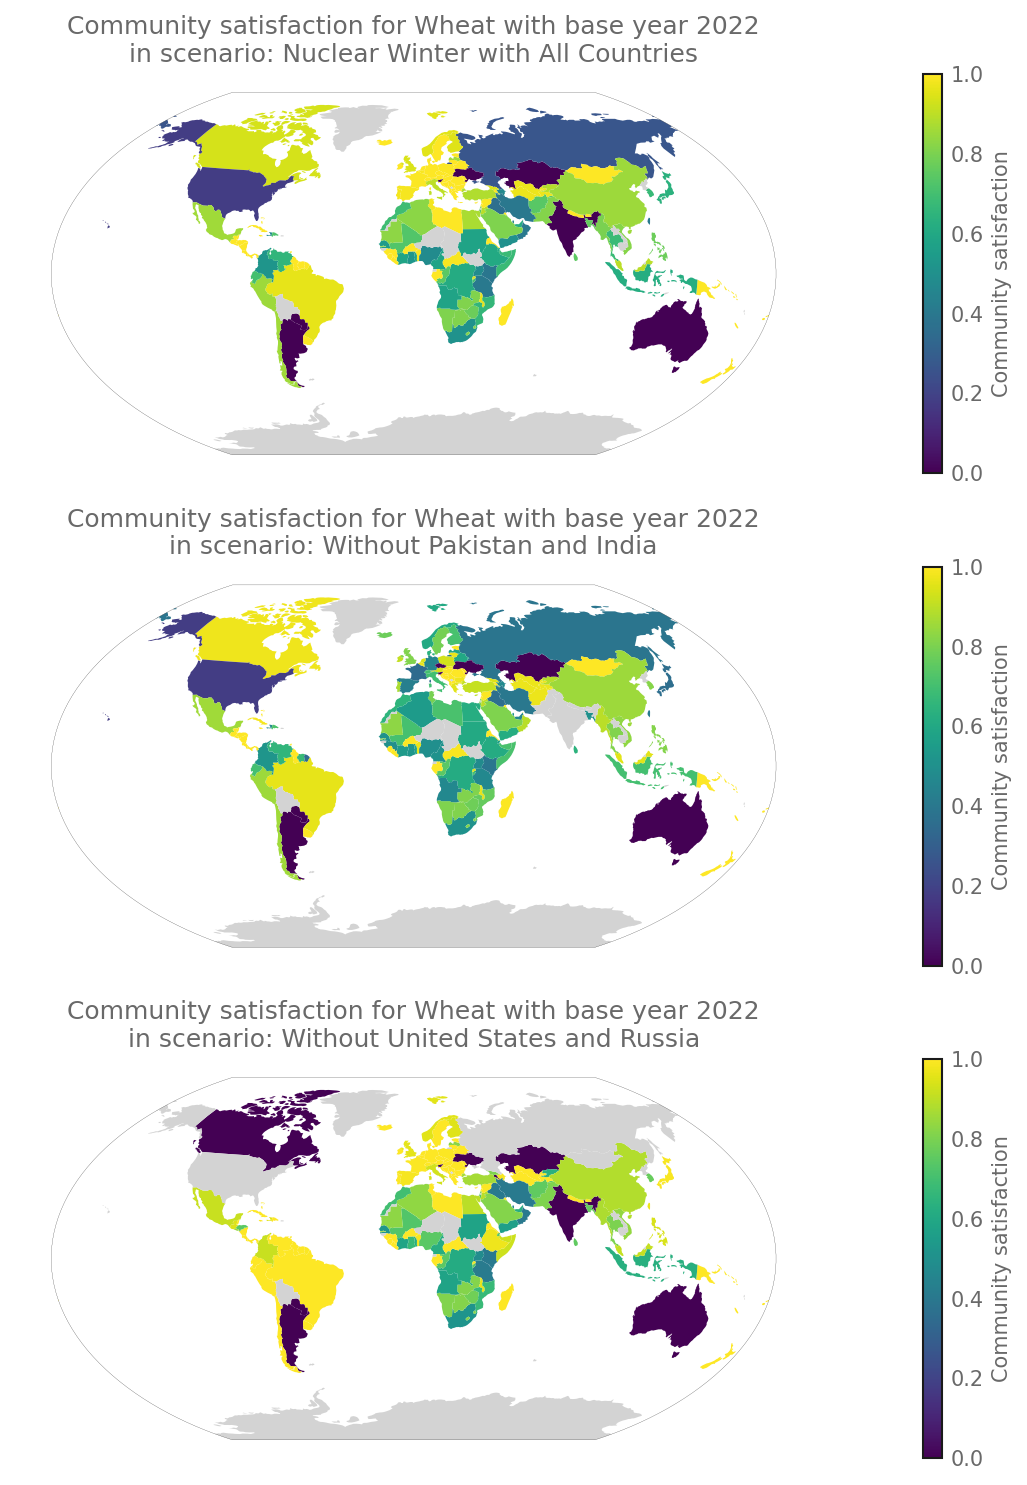

In [ ]:
comparison.plot_community_satisfaction(figsize=(15, 10))

and the difference from base scenario:

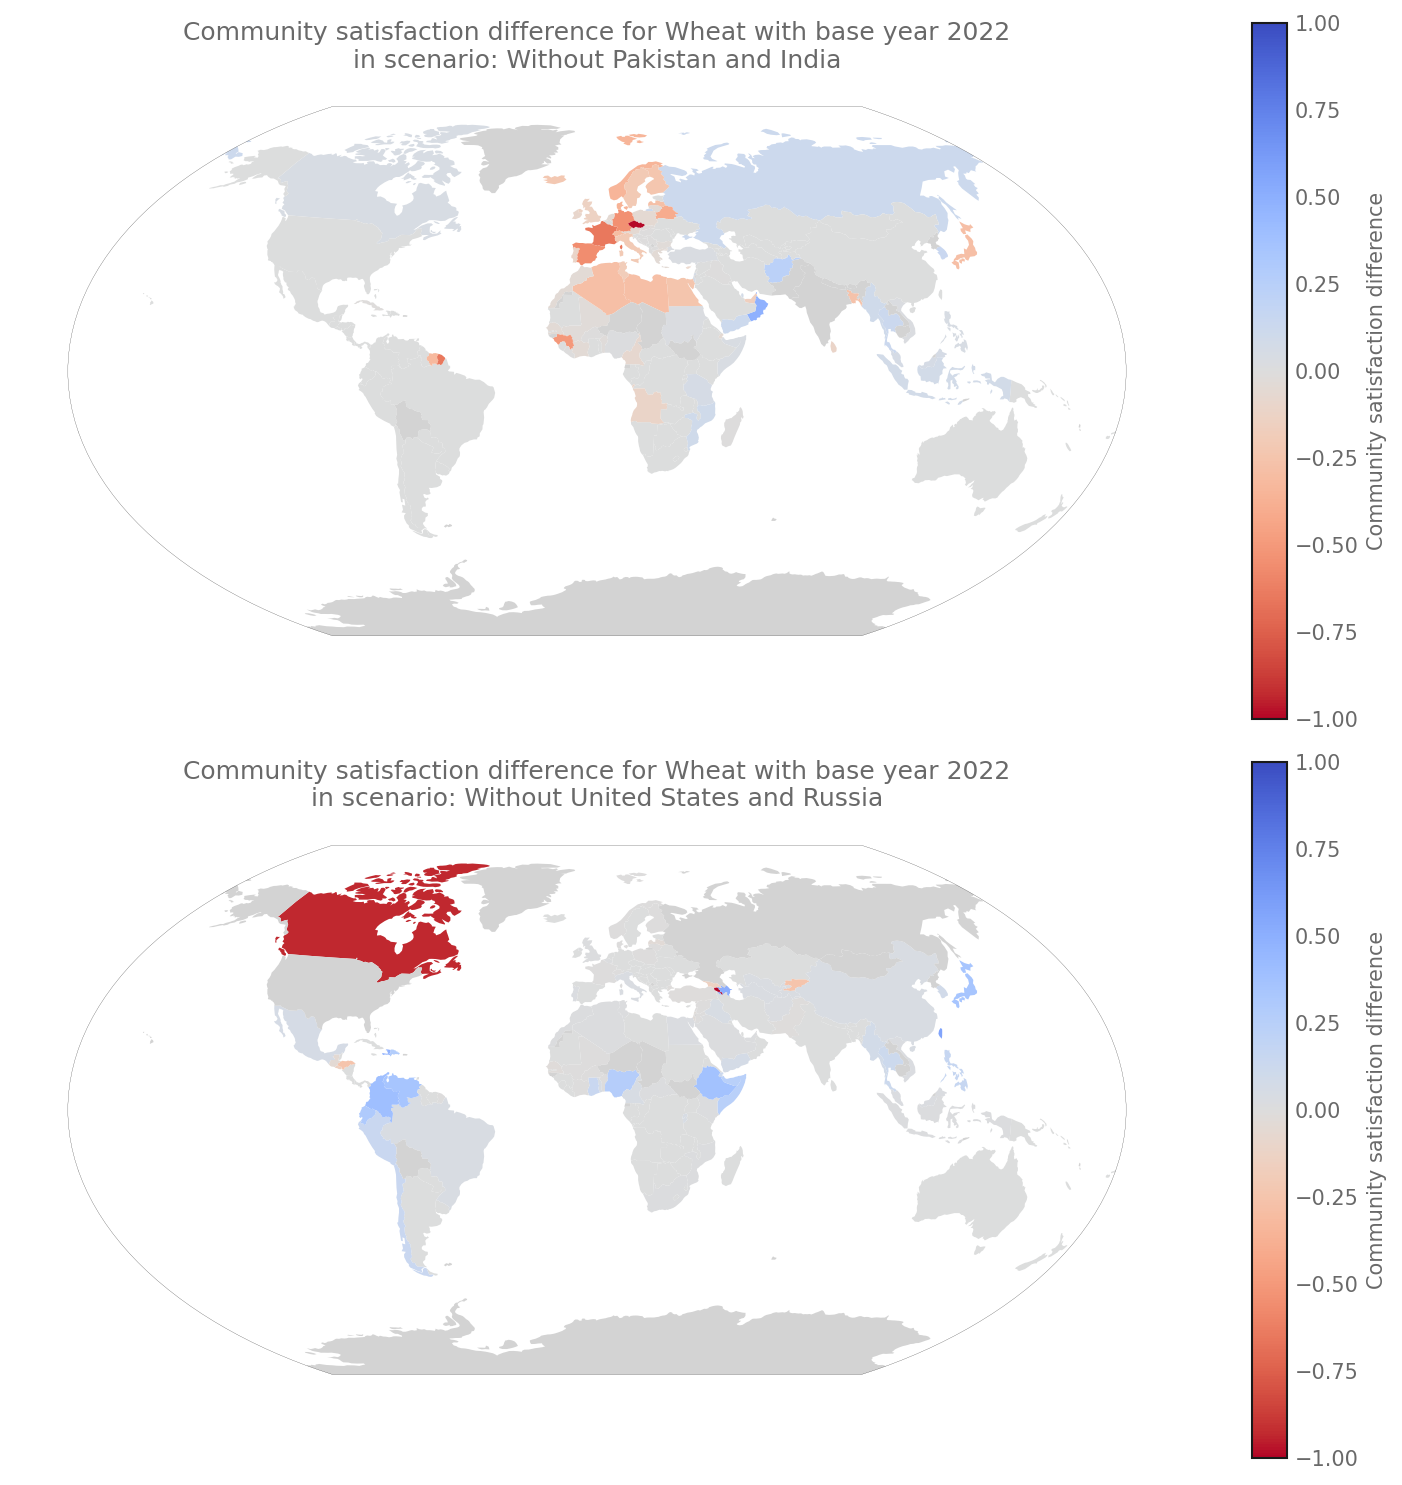

In [ ]:
comparison.plot_community_satisfaction_difference(figsize=(10,10), vmin=-1, vmax=1, cmap="coolwarm_r")

We also can look at country's stability index, which is a measure of how easily each country can replace their import partners (same paper as community satisfaction).

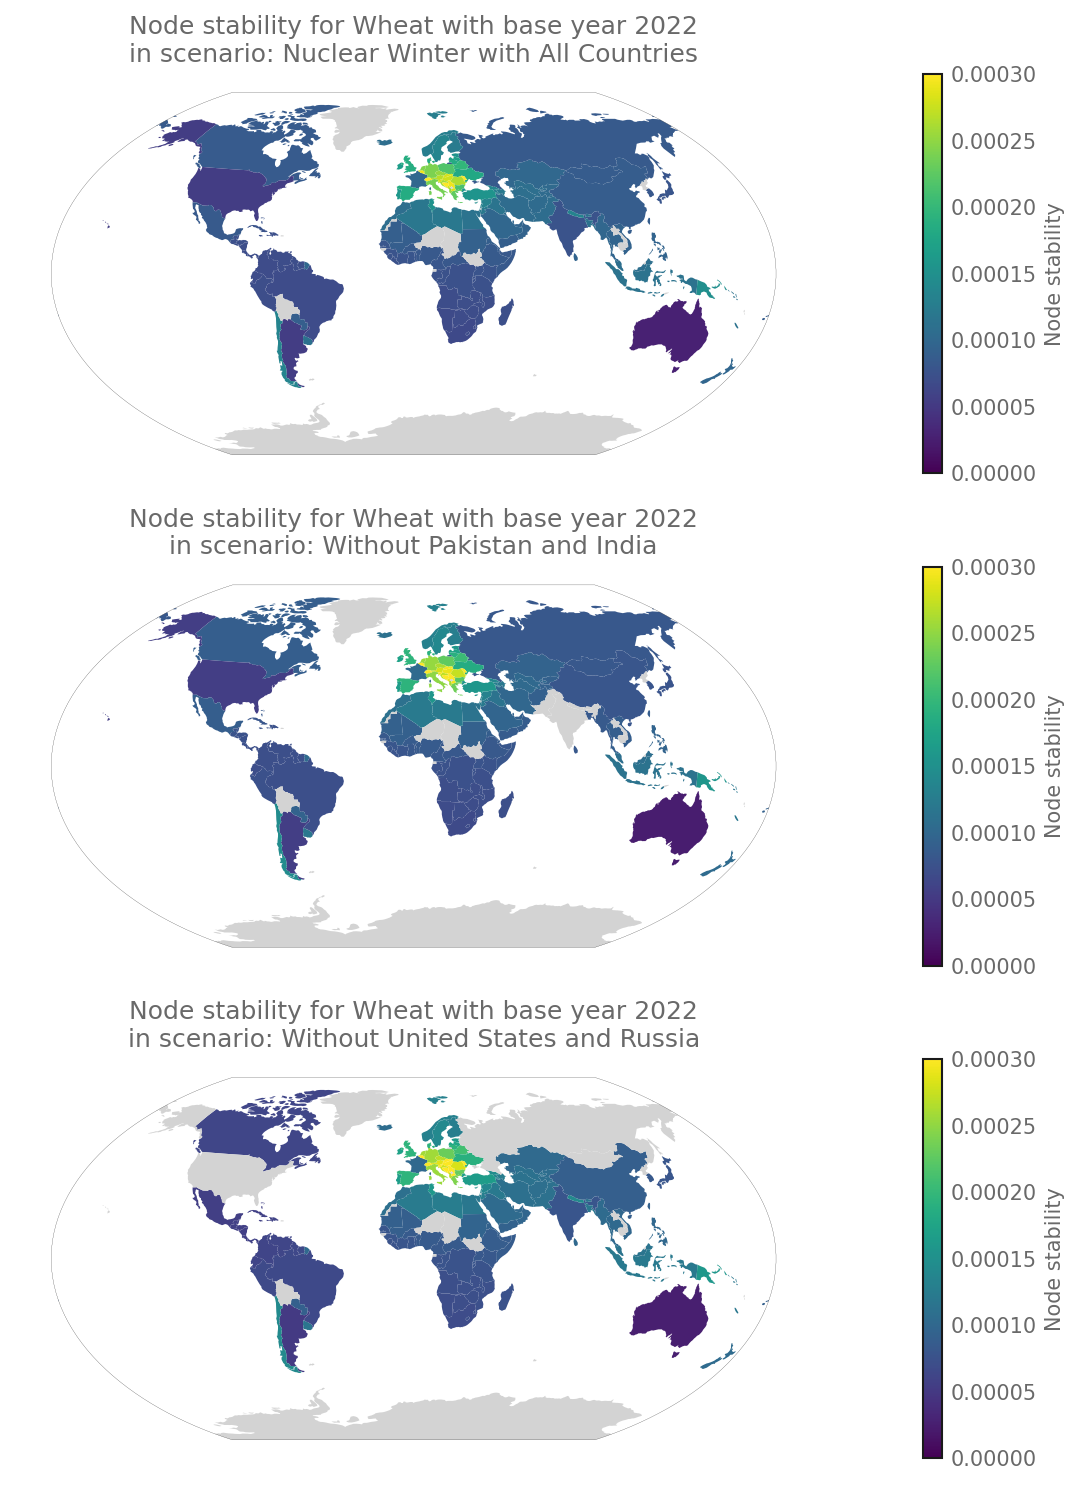

In [ ]:
comparison.plot_node_stability(figsize=(15, 10), vmin=0, vmax=0.0003) # figsize works here too of course

The units are dimensionless, so it is better to look at the relative change of the node stability to get a better view. 
For this reason we can look at the *relative* change of this metric:

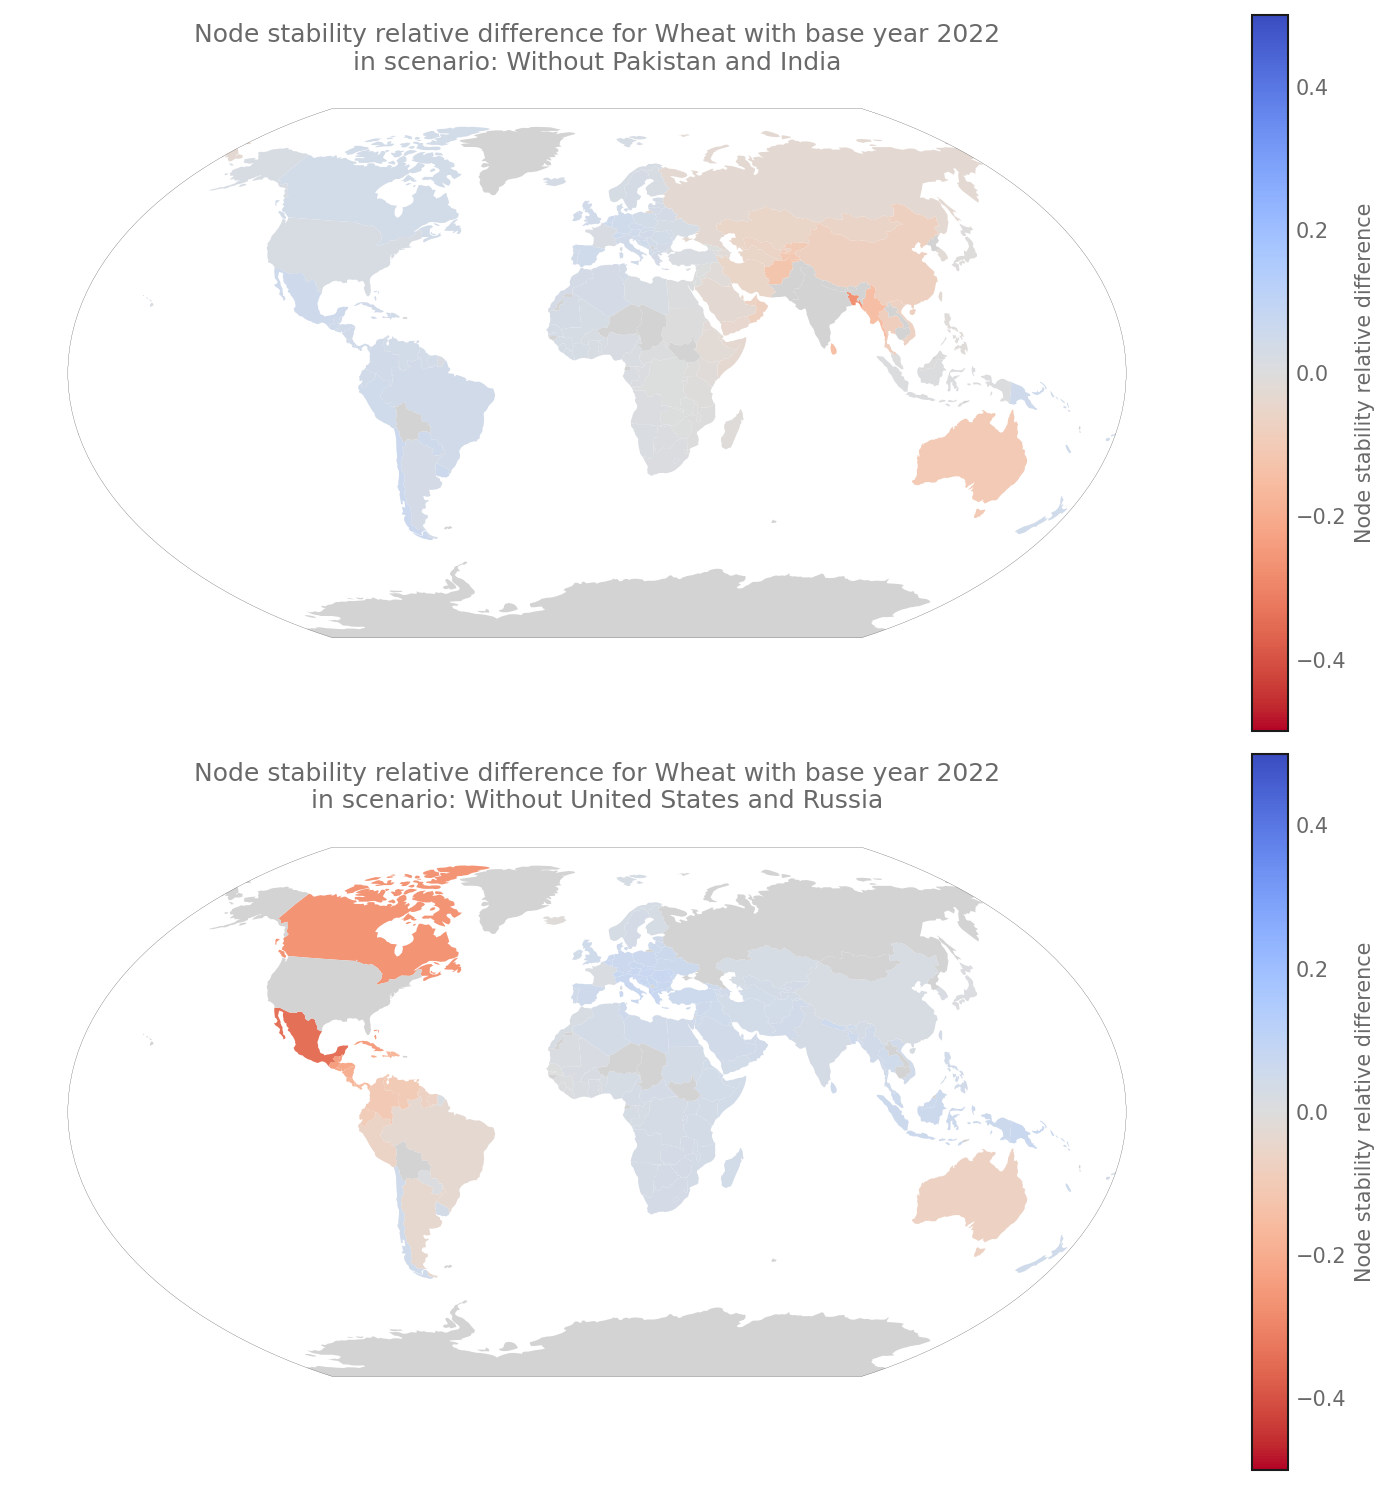

In [ ]:
comparison.plot_node_stability_difference(figsize=(10, 10), vmin=-0.5, vmax=0.5, cmap="coolwarm_r")

Another important aspect of a network is its resilience to attacks, and we can see that as well:

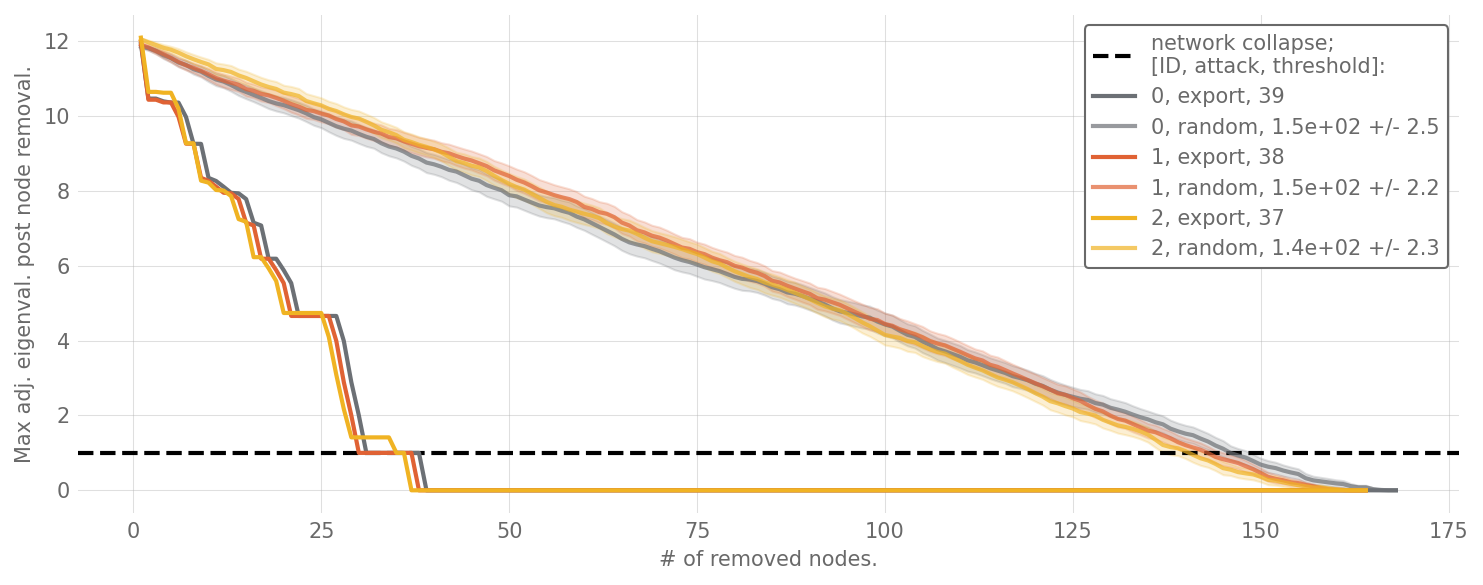

In [ ]:
comparison.plot_attack_resilience(exclude_attacks="entropic")